In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape = ', x_train.shape, ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력

11501568/11490434 [==============================] - 0s 0us/step

 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [5 0 4 ... 5 6 8]
 test label  =  [7 2 1 ... 4 5 6]


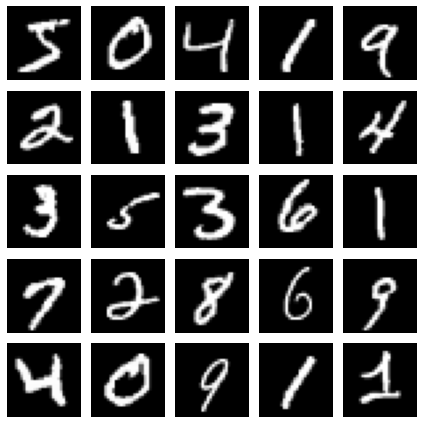

In [2]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')  

plt.tight_layout()
plt.show()

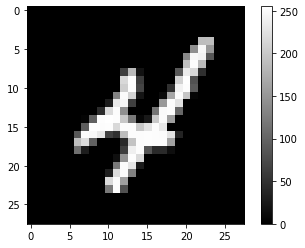

In [3]:
plt.imshow(x_train[9], cmap='gray') 
plt.colorbar()   
plt.show()

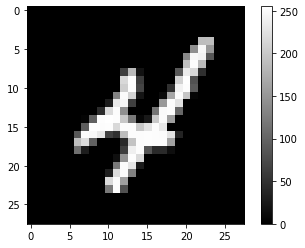

In [4]:
plt.imshow(x_train[9].reshape(28,28), cmap='gray') 
plt.colorbar()   
plt.show()

In [6]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)

x_test = (x_test - 0.0) / (255.0 - 0.0)

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 7s 3ms/step - loss: 0.3048 - accuracy: 0.9141 - val_loss: 0.1713 - val_accuracy: 0.9503
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1398 - accuracy: 0.9592 - val_loss: 0.1259 - val_accuracy: 0.9638
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0969 - accuracy: 0.9716 - val_loss: 0.1066 - val_accuracy: 0.9696
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0742 - accuracy: 0.9781 - val_loss: 0.1070 - val_accuracy: 0.9690
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0583 - accuracy: 0.9820 - val_loss: 0.0981 - val_accuracy: 0.9711
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0929 - val_accuracy: 0.9727
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0381 - accuracy: 0.9887 - val_loss: 0.0887 - val_accuracy:

In [10]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1258 - accuracy: 0.9769


[0.12581488490104675, 0.9768999814987183]

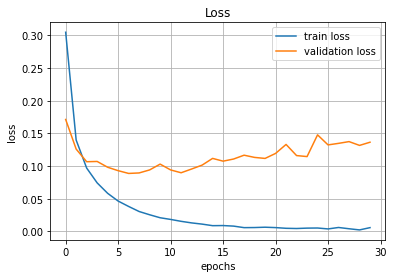

In [11]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

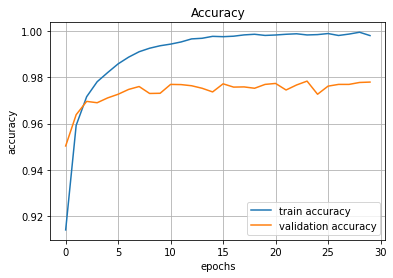

In [12]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [14]:
pred = model.predict(x_test)

print(pred.shape)

print(pred[:5])  

(10000, 10)
[[6.5770444e-15 7.0165668e-17 1.6726684e-11 1.4048585e-06 4.0470795e-26
  7.6842675e-16 9.8704791e-32 9.9999857e-01 4.4399177e-14 2.4774046e-12]
 [1.1059319e-16 8.3961474e-08 9.9999988e-01 2.7257696e-14 2.6698377e-37
  2.8487192e-18 7.9101573e-11 3.2107483e-37 8.1294495e-15 3.3010413e-35]
 [1.6395720e-10 9.9999833e-01 2.8833995e-07 1.3507166e-10 6.2589198e-11
  1.6296697e-10 9.9994035e-10 2.7064916e-08 1.4599105e-06 4.6540185e-12]
 [9.9999964e-01 2.5308641e-17 1.4518572e-07 2.9764499e-13 1.0270262e-24
  7.2141669e-16 2.1084568e-07 1.1954251e-13 3.8229452e-17 2.2668550e-15]
 [1.5804042e-13 1.2440421e-20 2.4242015e-14 2.6826220e-20 9.9999988e-01
  1.2160796e-16 6.6280592e-14 1.4383428e-10 3.1509544e-14 1.4106205e-07]]


# numpy.random.choice() 함수를 이용해서 x_test 에서 임의로 서로 다른 5개의 데이터를 추출해서 model.predict() 실행하시오

In [15]:
import numpy as np

random_index_list = np.random.choice(len(x_test), 5, False)

print(random_index_list)

[4670 2822 3688 8202 6776]


In [16]:
random_x_test_list = []

for index in random_index_list:

    random_x_test_list.append(x_test[index])

random_x_test_array = np.array(random_x_test_list)

print(random_x_test_array.shape)

(5, 28, 28)


In [17]:
random_pred = model.predict(random_x_test_array)

print(random_pred.shape)

print(np.argmax(random_pred, axis=1), t_test[random_index_list])

(5, 10)
[1 1 6 7 8] [1 1 6 7 8]
